In [ ]:
!git clone https://github.com/DrikDrik/sber-movqgan-project

In [1]:
import sys
sys.path.append('/content/sber-movqgan-project/')

In [ ]:
!pip install pip==24.0
!pip install -r 'sber-movqgan-project/requirements.txt'

In [3]:
from models.GAN.model import generate_new_codes, Critic, Generator
from models.GAN.train import training_loop
from pipeline.movqgan import decode
from pipeline.show import show_images

In [4]:
from utils.imports import *

In [ ]:
from pipeline.movqgan import get_model, decode
model = get_model()

In [ ]:
from utils import download_datasets
download_datasets.main()

In [ ]:
!unzip -q datasets/latent_dataset.zip -d '/content/latent_representations/'

In [8]:
from pipeline.get_latent import LatentDataset

In [9]:
import os
temp_dataset = LatentDataset('latent_representations')
temp_loader = DataLoader(temp_dataset, batch_size=128, shuffle=True)

In [10]:
from utils import normalize
normalize_fn = normalize.normalize_fn(temp_loader)
inverse_normalize_fn = normalize.inverse_normalize_fn(temp_loader)

In [11]:
transform = transforms.Compose([
    transforms.Lambda(normalize_fn)
])
dataset = LatentDataset('latent_representations', transform=transform)
loader = DataLoader(dataset, batch_size=200, shuffle=True)

In [12]:
import gdown

weight_url = "https://drive.google.com/uc?export=download&id=12L6JPGABnWTmtrLk0-EoFTJ-jPbNchfw"
model_path = "gan_weights.ckpt"

def download_model_weights(url, output_path='gan_weights.ckpt'):
    gdown.download(url, output_path, quiet=False)

def load_gan_weights_from_ckpt(generator, critic, weight_path='gan_weights.ckpt'):
    checkpoint = torch.load(weight_path, map_location='cpu')  # можно поменять на device при необходимости
    generator.load_state_dict(checkpoint['generator'])
    critic.load_state_dict(checkpoint['critic'])
    print(f"Веса генератора и критика успешно загружены из {weight_path}")



In [14]:
device='cuda'
generator = Generator(latent_dim=128).to(device)
critic = Critic().to(device)

In [ ]:
download_model_weights(weight_url, model_path)
load_gan_weights_from_ckpt(generator, critic, model_path)


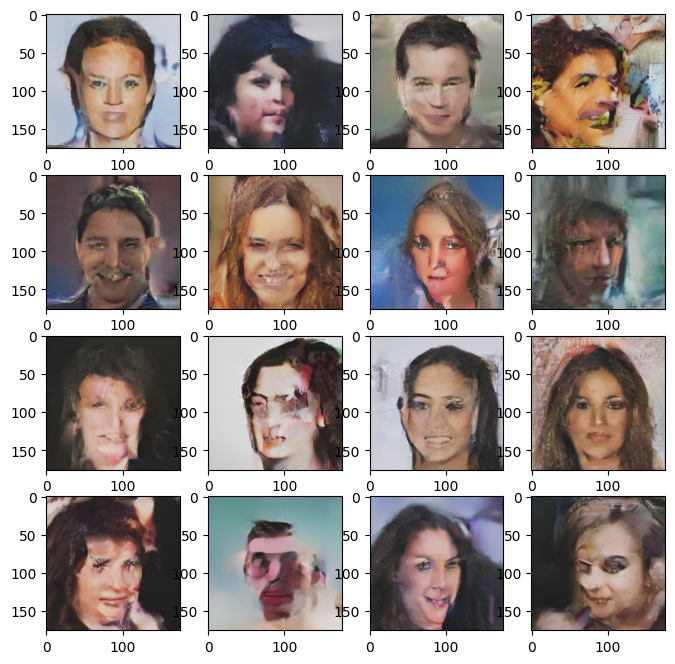

In [17]:
generator.eval()
show_images(F.tanh(decode(model, inverse_normalize_fn(generate_new_codes(generator, latent_dim=128, c=4, h=22, w=22, device=device)))))

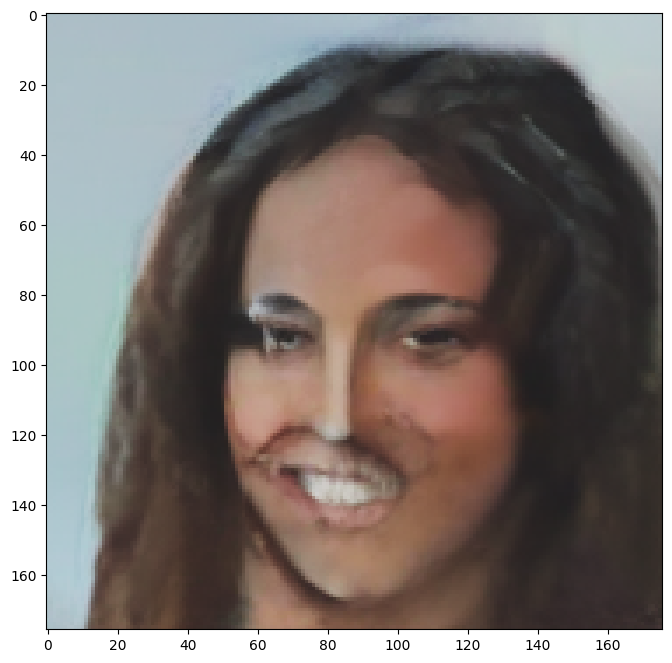

In [19]:
show_images(F.tanh(decode(model, inverse_normalize_fn(generate_new_codes(generator, n_samples=1, latent_dim=128, c=4, h=22, w=22, device=device)))))

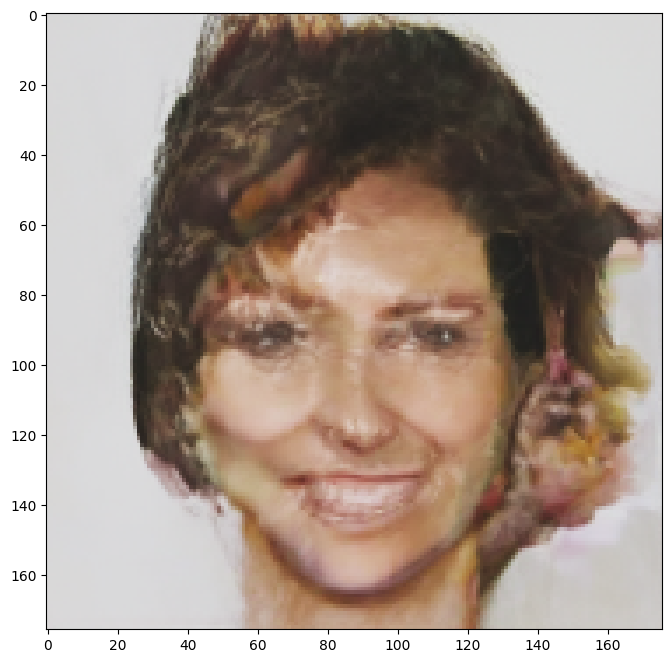

In [44]:
show_images(F.tanh(decode(model, inverse_normalize_fn(generate_new_codes(generator, n_samples=1, latent_dim=128, c=4, h=22, w=22, device=device)))))

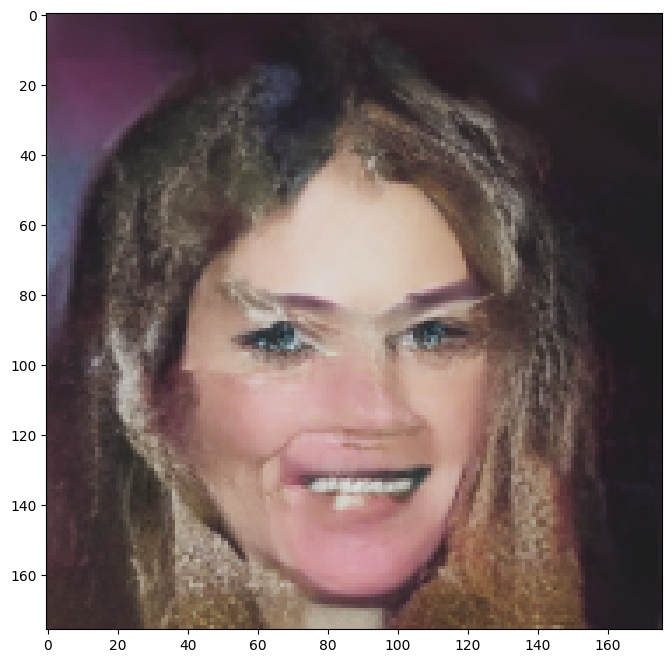

In [127]:
show_images(F.tanh(decode(model, inverse_normalize_fn(generate_new_codes(generator, n_samples=1, latent_dim=128, c=4, h=22, w=22, device=device)))))